# Nabla

Automatic, machine-precision forward differentiation in python using dual numbers.

In [1]:
from nabla import grad

def f(x):
    return 3*x*x

print(grad(f)(5))

Dual(75,  [30.])


Support for multiple variables:

In [2]:
def f(x, y, param, z):
    return 2*x*y + z**4

x, y, z, param = 1, 2, 3, "this is a non-numeric parameter"

print(f(x, y, param, z))
# Get the gradient w.r.t. x,y,z
# The non-numeric parameter is automatically ignored
print(grad(f)(x, y, param, z))

85
Dual(85,  [  4.   2. 108.])


Specify variables explicitly by position:

In [3]:
# Find gradient w.r.t y,x
print(grad([1,0])(f)(x, y, param, z))

Dual(85,  [2. 4.])


Use decorators:

In [4]:
from nabla import sin, cos

@grad
def f(x, y):
    return sin(x)*cos(y)

print(f(1,2))

Dual(-0.35017548837401463,  [-0.2248451 -0.7651474])


## Gradient descent without any extra code

In [5]:
from nabla import minimise

def f(x, y, z):
        return sin(x+1) + 2*cos(y-1) + (z-1)**2

x0, fval, gradient = minimise(f, [0, 0, 0])
print("Minimum found at x0 = {}".format(x0))
print("Function, gradient at minimum = {}, {}\n".format(fval, gradient))

# Can also minimise w.r.t. a subset of variables
# Here we minimise w.r.t. x and y while holding z=0 fixed
x0, fval, gradient = minimise(f, [0, 0, 0], variables=[0,1])
print("Minimum found at x0 = {}".format(x0))
print("Function, gradient at minimum = {}, {}\n".format(fval, gradient))

Minimum found at x0 = [-2.57078753 -2.14159265  1.        ]
Function, gradient at minimum = -2.9999999999612683, [ 8.80130830e-06  2.20381559e-12 -5.04263298e-13]

Minimum found at x0 = [-2.57078753 -2.14159265  0.        ]
Function, gradient at minimum = -1.9999999999612683, [8.80130830e-06 2.20381559e-12]



## Comparison with finite-difference

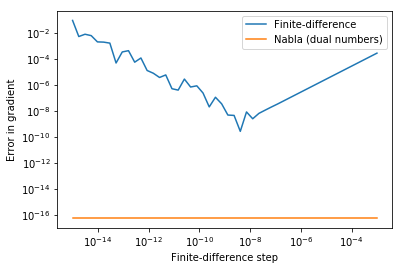

In [6]:
from nabla import sin, sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return sqrt(3*x + sin(x)**2)/(4*x**3 + 2*x + 1)

def analytical_derivative(x):
    A = (2*sin(x)*cos(x)+3)/(2*(4*x**3 + 2*x + 1)*sqrt(3*x + sin(x)**2))
    B = (12*x**2 + 2)*sqrt(3*x + sin(x)**2) / (4*x**3 + 2*x + 1)**2
    return A - B

x = 1
dfdx_nabla = grad(f)(x).dual
dfdx_analytic = analytical_derivative(x)

eps = np.logspace(-15, -3)
dfdx_fd = np.zeros(eps.shape)
for i,e in enumerate(eps):
    dfdx_fd[i] = (f(x+e) - f(x))/e

err_nabla = np.abs(dfdx_nabla - dfdx_analytic) * np.ones(eps.shape)
err_fd = np.abs(dfdx_fd - dfdx_analytic)
    
# Plot error
plt.loglog(eps, err_fd, label='Finite-difference')
plt.loglog(eps, err_nabla, label='Nabla (dual numbers)')
plt.xlabel('Finite-difference step')
plt.ylabel('Error in gradient')
plt.legend()

Compare time taken:

In [7]:
%timeit -n10000 grad(f)(x)
%timeit -n10000 (f(x+1e-8) - f(x))/1e-8

121 µs ± 8.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.97 µs ± 27 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
